In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("data/consommation-quotidienne-brute-regionale.csv", sep=";")

In [55]:
df

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207791,2023-06-23T13:00:00+02:00,2023-06-23,13:00,76,Occitanie,281.0,Meilleur Statut,570.0,Définitif,851.0,4041,Consolidé,4892.0
2207792,2023-06-23T13:30:00+02:00,2023-06-23,13:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,1761,Consolidé,NaN
2207793,2023-06-23T14:00:00+02:00,2023-06-23,14:00,44,Grand Est,3552.0,Meilleur Statut,NaN,NaN,3552.0,4548,Consolidé,8100.0
2207794,2023-06-23T14:00:00+02:00,2023-06-23,14:00,52,Pays de la Loire,778.0,Meilleur Statut,NaN,NaN,778.0,2778,Consolidé,3556.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB



    1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

In [57]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hdf = df[df['region'] == 'Hauts-de-France']

In [58]:

df_hdf.set_index('date_heure',inplace=True)

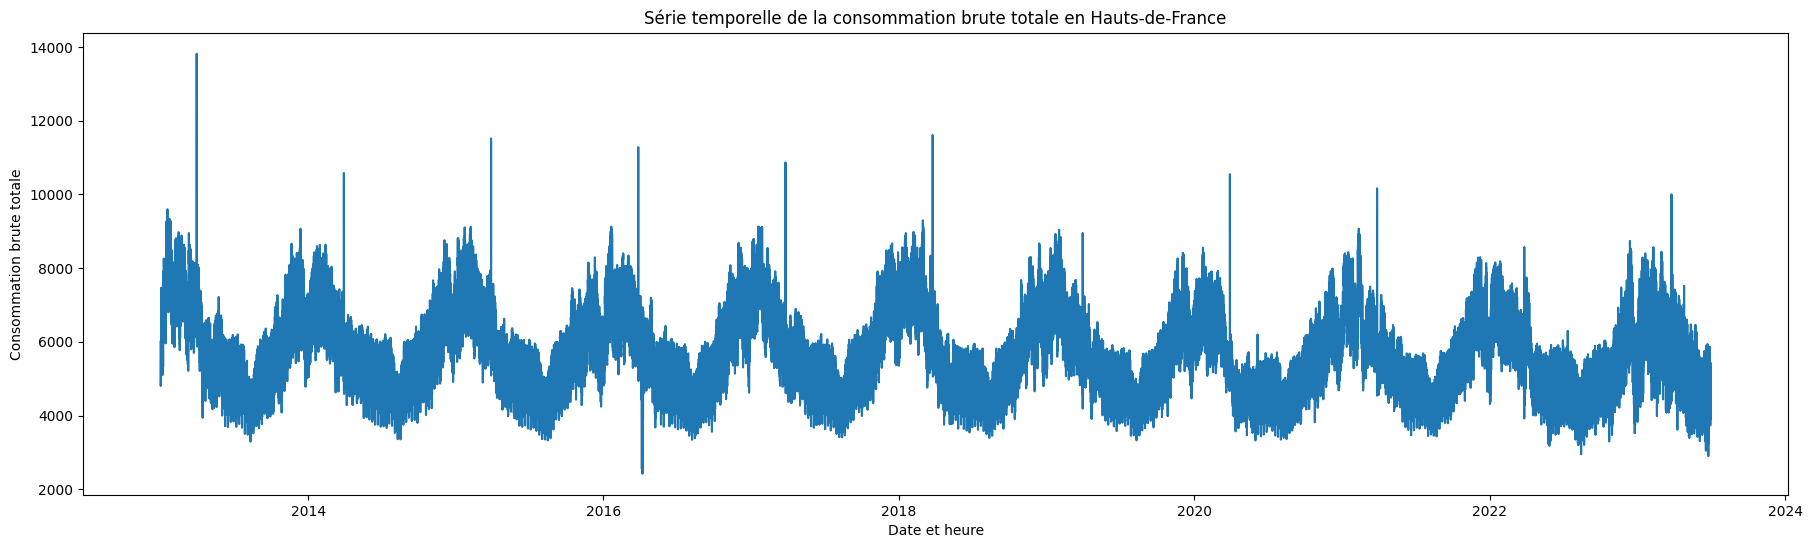

In [59]:
df_grouped = df_hdf.groupby(df_hdf.index)['consommation_brute_electricite_rte'].sum()

plt.figure(figsize=(22, 6))
plt.plot(df_grouped.index, df_grouped)
plt.xlabel('Date et heure')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale en Hauts-de-France')
plt.show()


    2. Affichez cette même série temporelle en rassemblant:
        1. Par année
        2. Par trimestre
        3. Par mois
        4. Par semaine
        5. Par jour

/tmp/ipykernel_161391/2773905622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['annee'] = df_hdf.index.year


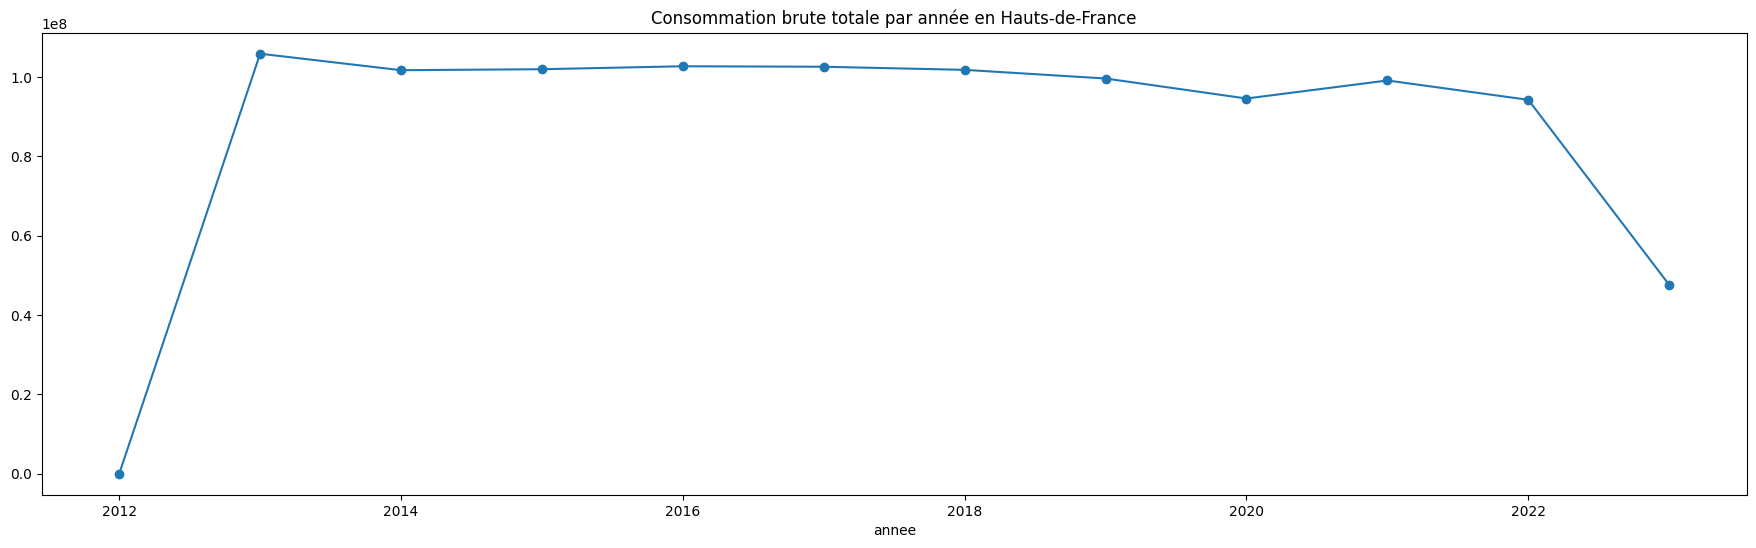

In [60]:
df_hdf['annee'] = df_hdf.index.year
df_annee_hdf = df_hdf.groupby('annee')['consommation_brute_electricite_rte'].sum()

plt.figure(figsize=(22, 6))
df_annee_hdf.plot(kind='line', marker="o")
plt.title('Consommation brute totale par année en Hauts-de-France')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_161391/3312401597.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['trimestre'] = df_hdf.index.to_period("Q")
/tmp/ipykernel_161391/3312401597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['trimestre'] = df_hdf.index.to_period("Q")


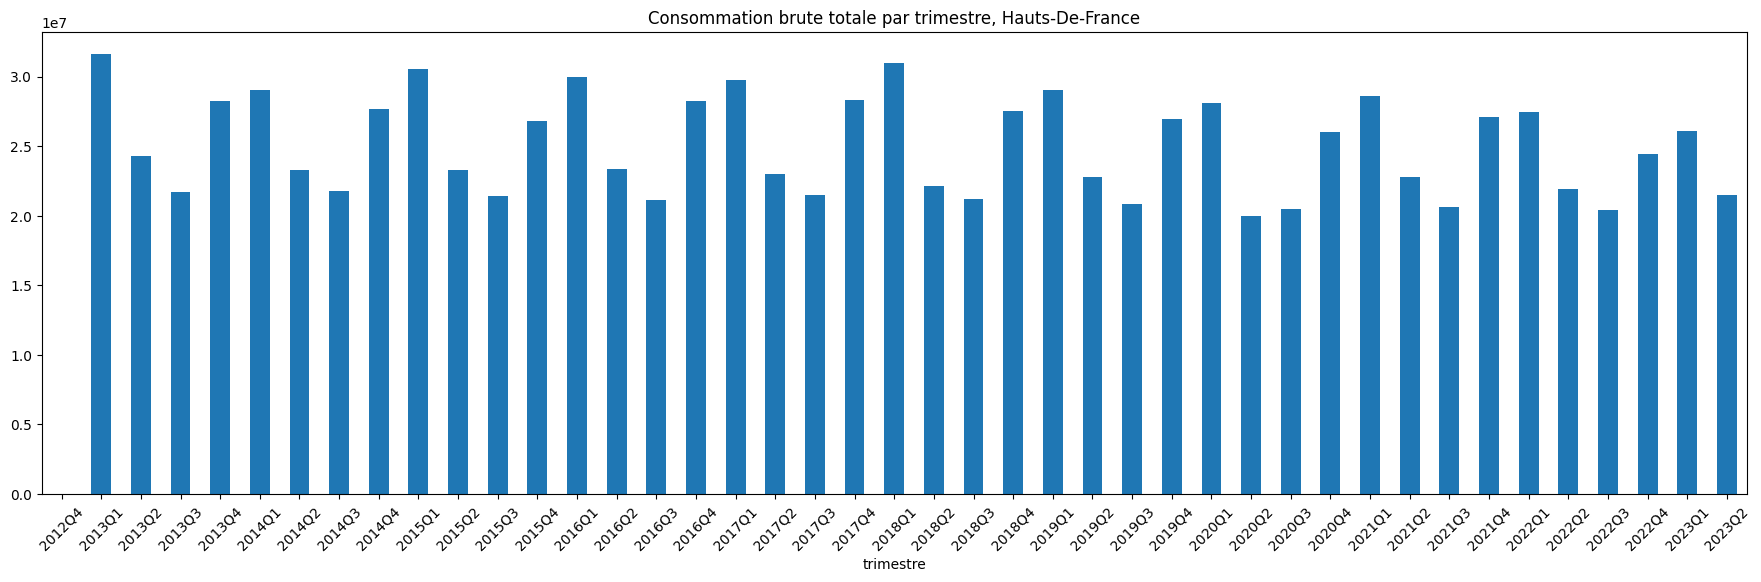

In [61]:
df_hdf['trimestre'] = df_hdf.index.to_period("Q")
df_trimestre = df_hdf.groupby('trimestre')['consommation_brute_electricite_rte'].sum()

plt.figure(figsize=(22, 6))
df_trimestre.plot(kind='bar')
plt.title('Consommation brute totale par trimestre, Hauts-De-France')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_161391/2571388407.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['mois'] = df_hdf.index.to_period("M")
/tmp/ipykernel_161391/2571388407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['mois'] = df_hdf.index.to_period("M")


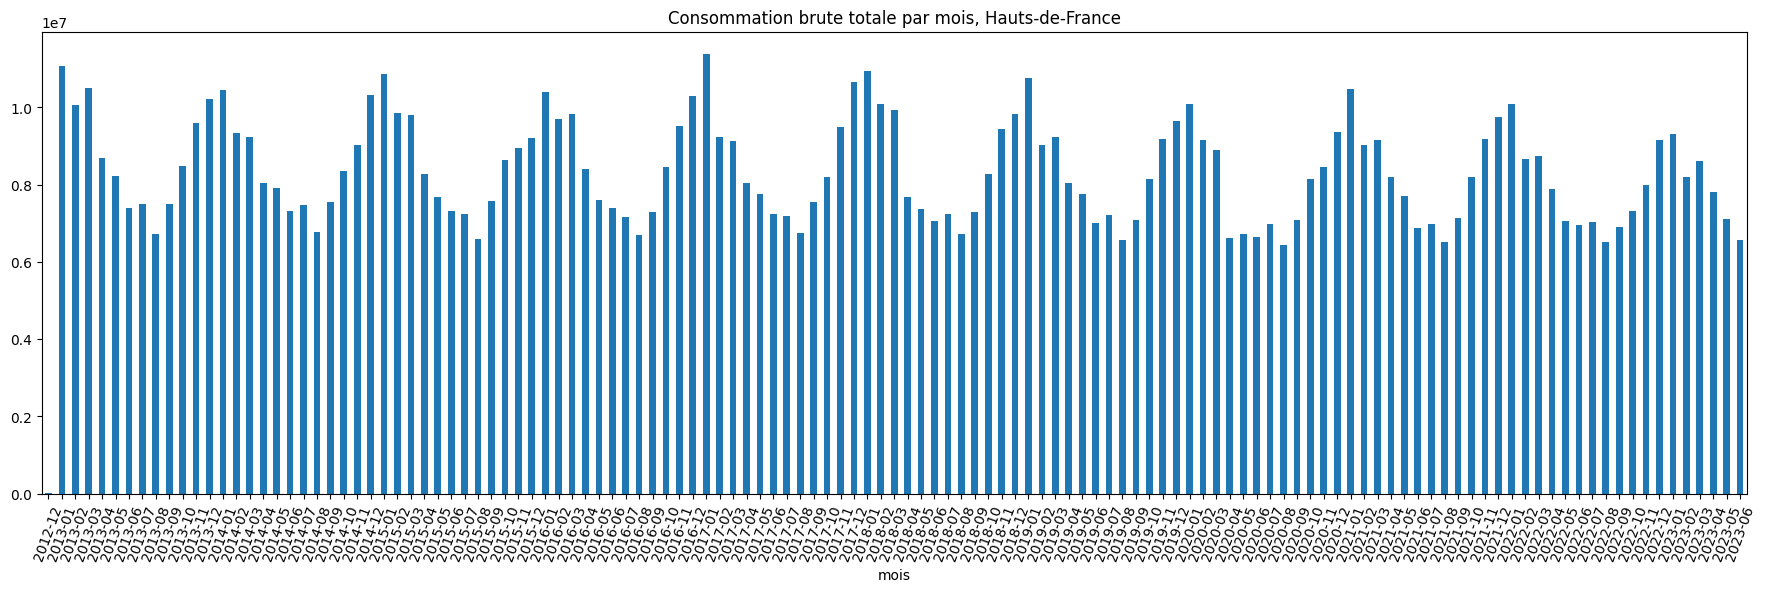

In [62]:
df_hdf['mois'] = df_hdf.index.to_period("M")
df_mois = df_hdf.groupby('mois')['consommation_brute_electricite_rte'].sum()

plt.figure(figsize=(22, 6))
df_mois.plot(kind='bar')
plt.title('Consommation brute totale par mois, Hauts-de-France')
plt.xticks(rotation=70)
plt.show()


/tmp/ipykernel_161391/3493938933.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['semaine'] = df_hdf.index.to_period("W")
/tmp/ipykernel_161391/3493938933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['semaine'] = df_hdf.index.to_period("W")


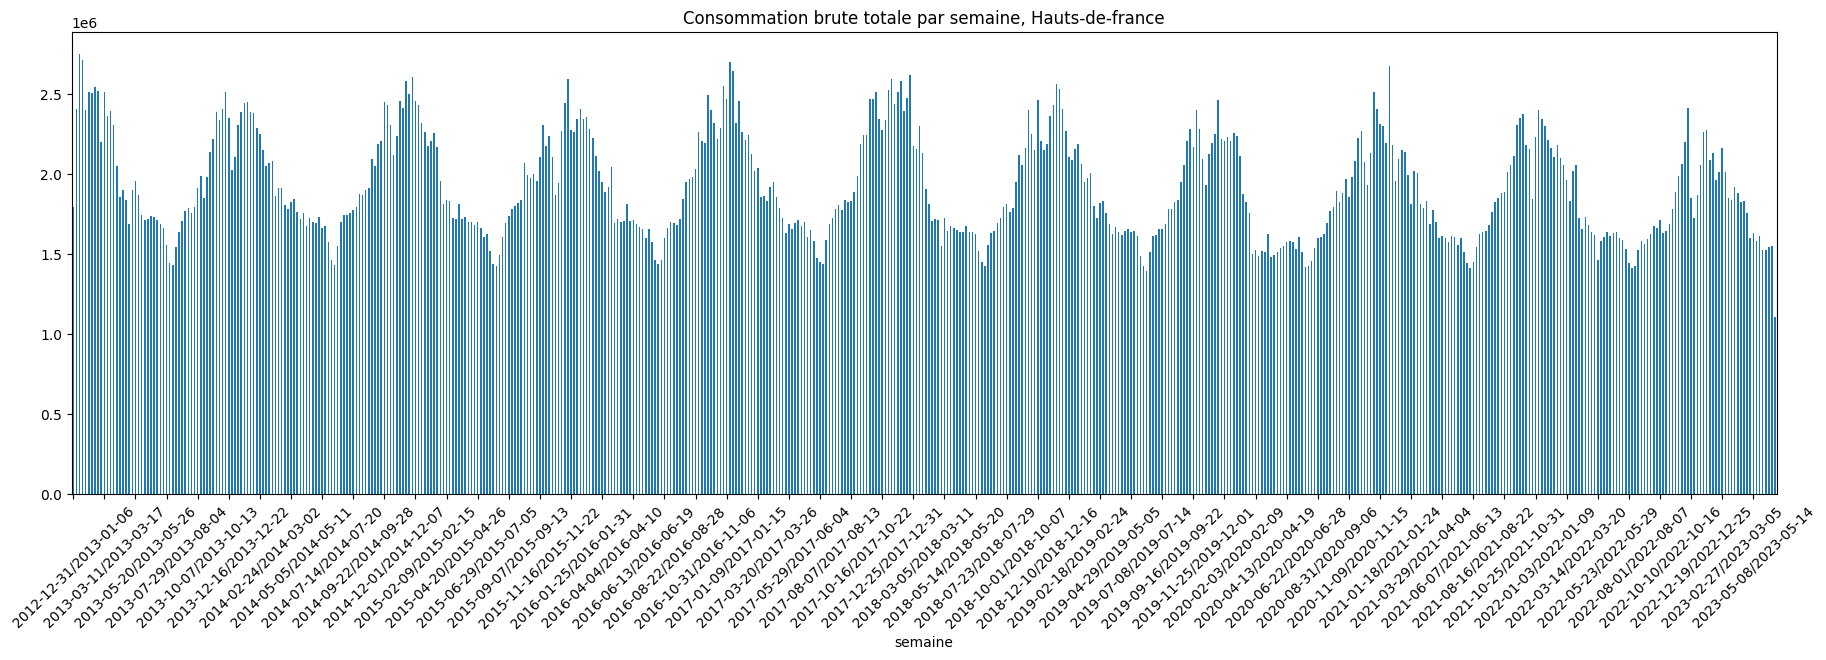

In [63]:
df_hdf['semaine'] = df_hdf.index.to_period("W")
df_semaine = df_hdf.groupby('semaine')['consommation_brute_electricite_rte'].sum()

plt.figure(figsize=(22, 6))
df_semaine.plot(kind='bar')
plt.title('Consommation brute totale par semaine, Hauts-de-france')
plt.xticks(ticks=[i for i in range(0, len(df_semaine), 10)],rotation=45)
plt.show()


/tmp/ipykernel_161391/1927754576.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['jour'] = df_hdf.index.to_period("D")
/tmp/ipykernel_161391/1927754576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['jour'] = df_hdf.index.to_period("D")


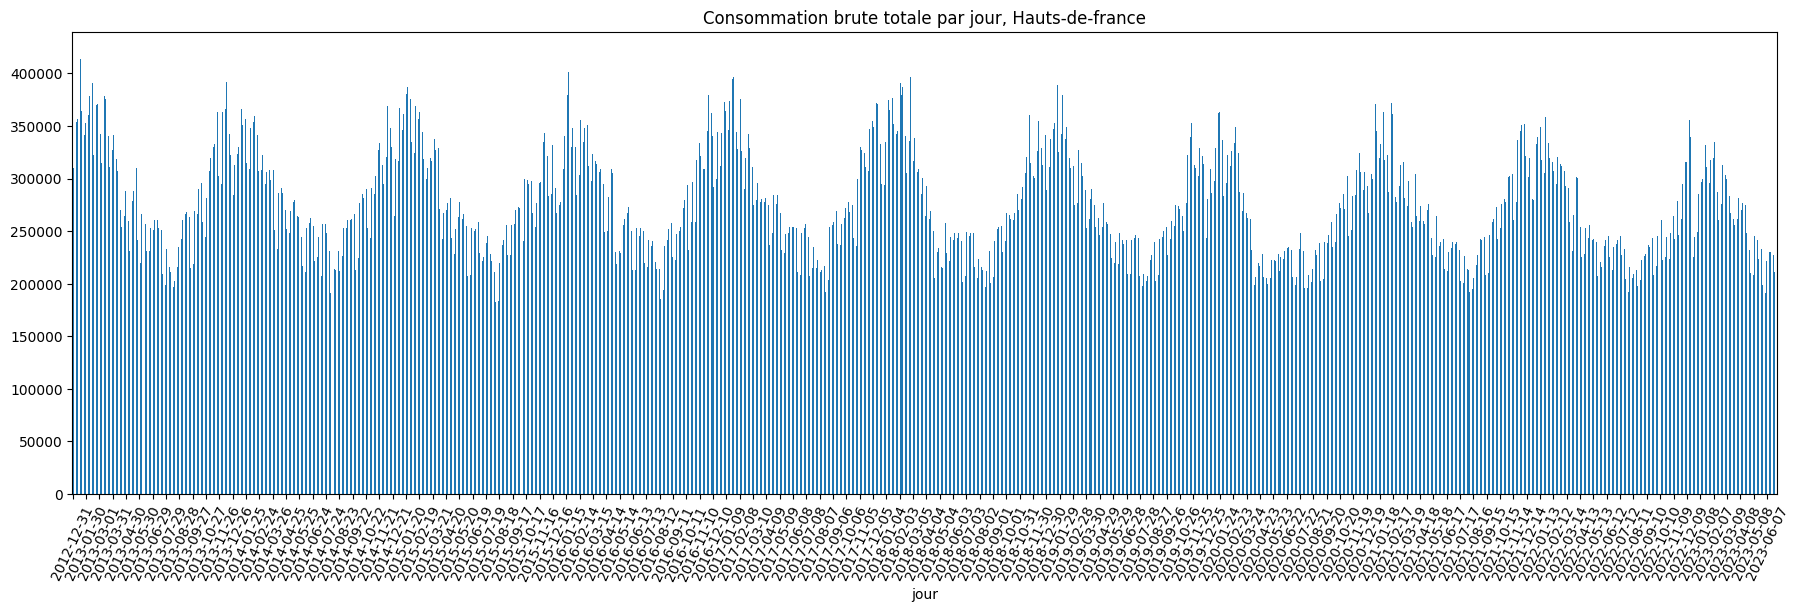

In [64]:
df_hdf['jour'] = df_hdf.index.to_period("D")
df_jour = df_hdf.groupby('jour')['consommation_brute_electricite_rte'].sum()

plt.figure(figsize=(22, 6))
df_jour.plot(kind='bar')
plt.title('Consommation brute totale par jour, Hauts-de-france')
plt.xticks(ticks=[i for i in range(0, len(df_jour), 30)],rotation=65)
plt.show()


         
    3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

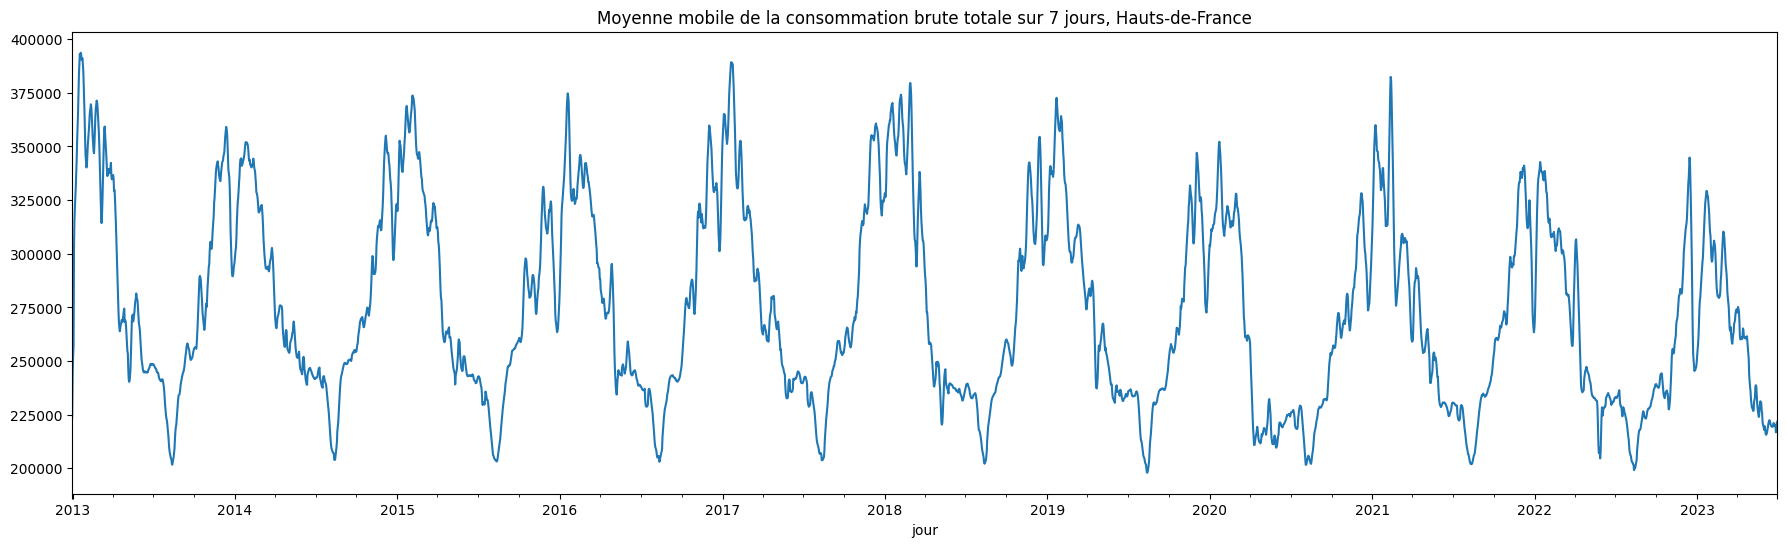

In [65]:
moyenne_mobile = df_jour.rolling(window="7D", center=True, win_type=None).mean().plot(figsize=(22,6), title='Moyenne mobile de la consommation brute totale sur 7 jours, Hauts-de-France')




     
    4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

        Moyenne mobile :

    Une moyenne mobile prend la moyenne des "n" points de données adjacents pour créer une nouvelle série.
    Cela "lisse" la série en minimisant les fluctuations de courte durée et en mettant en évidence les tendances à plus long terme.
    C'est un calcul itératif : à chaque nouvelle période, la moyenne mobile se met à jour en incluant la valeur la plus récente et en excluant la valeur la plus ancienne de la période.
    Une moyenne mobile centrée place le point moyen au centre de la fenêtre, ce qui permet de mieux représenter les tendances au moment "t" en utilisant des informations avant et après "t".

    En résumé, la moyenne mobile est utile pour lisser des données bruitées et mettre en évidence des tendances à long terme, tandis que les agrégations comme groupby().sum() sont plus utiles pour obtenir une valeur sommaire par unité de temps.

     
    5. A l’aide de box-plots, observez la saisonnalité:
        1. trimestrielle (chaque trimestre)
        2. mensuelle (chaque mois)
        3. hebdomadaire (chaque jour)
        4. journalière (chaque heure)

/tmp/ipykernel_161391/3770827797.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['trimestre'] = df_hdf.index.to_period('Q')
/tmp/ipykernel_161391/3770827797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['trimestre'] = df_hdf.index.to_period('Q')


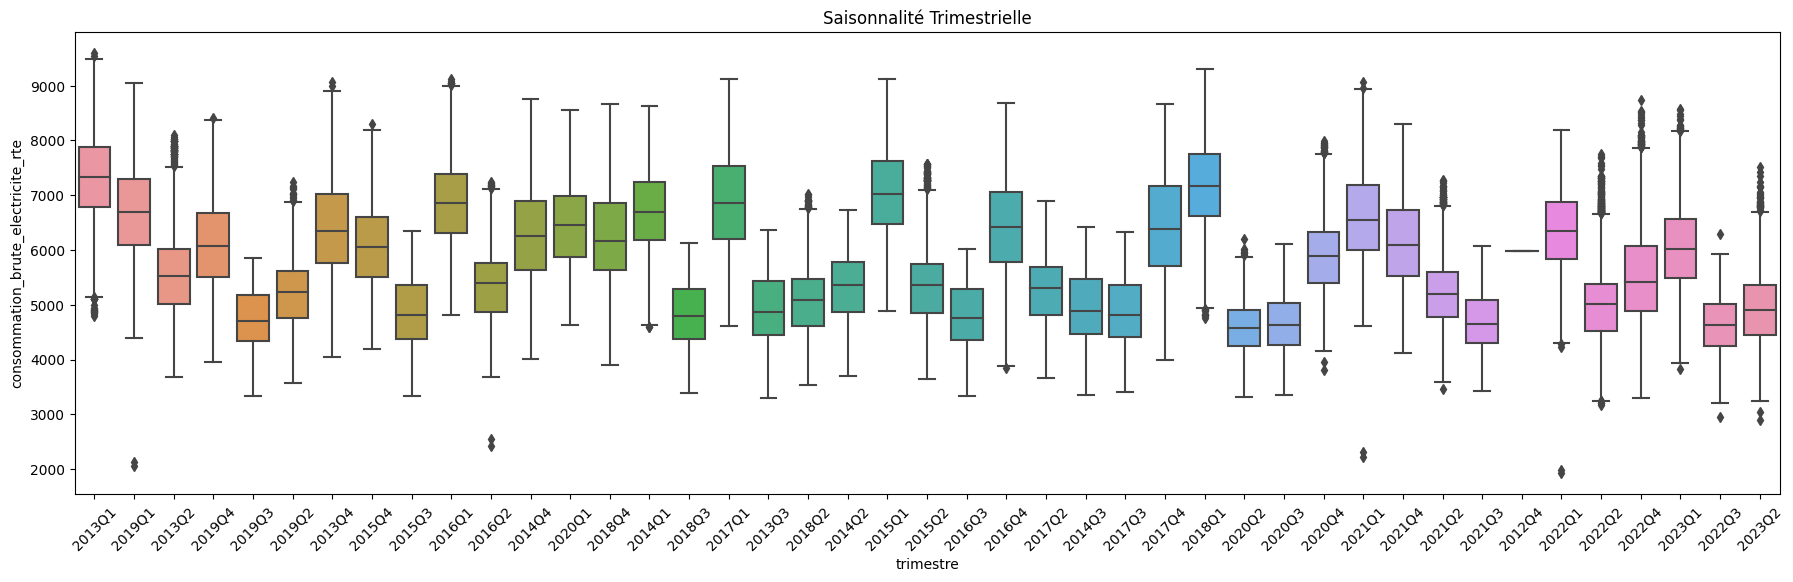

In [66]:
df_hdf['trimestre'] = df_hdf.index.to_period('Q')
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='trimestre', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité Trimestrielle')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_161391/1080321129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['mois'] = df_hdf.index.month


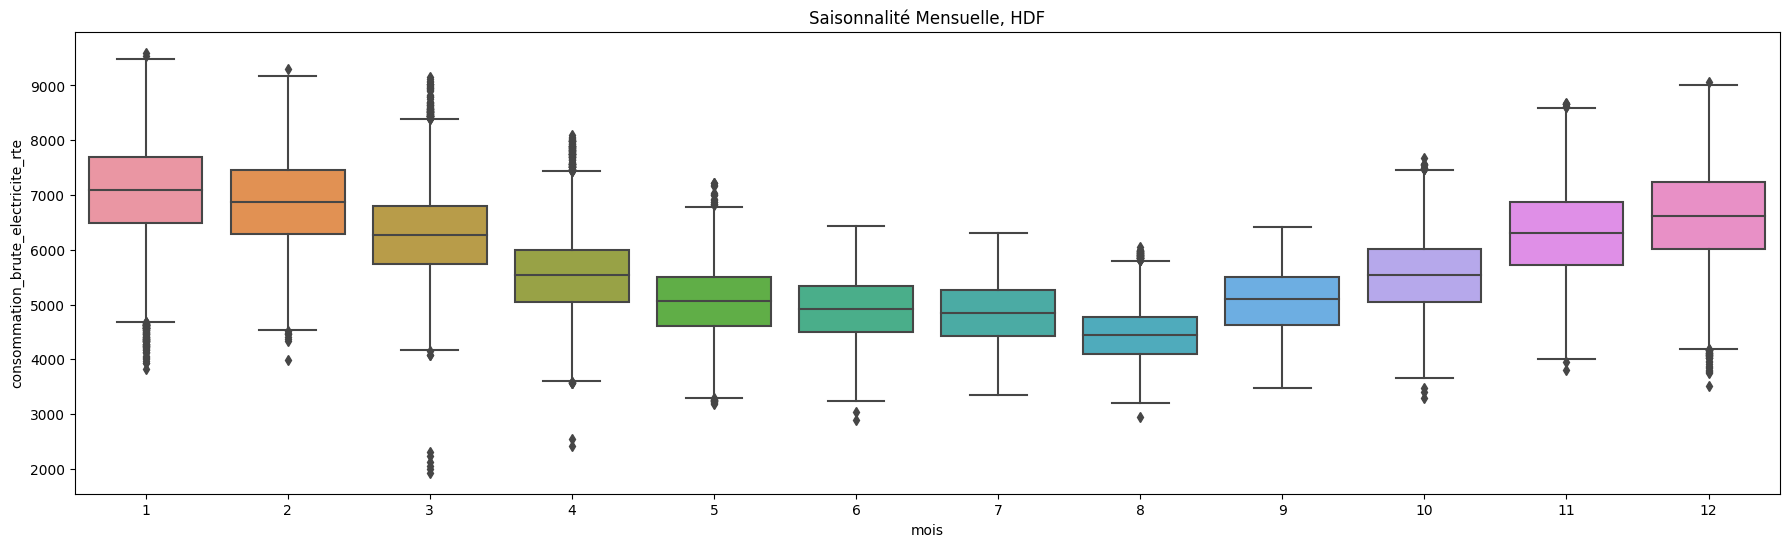

In [67]:
df_hdf['mois'] = df_hdf.index.month
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='mois', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité Mensuelle, HDF')
plt.show()


/tmp/ipykernel_161391/1061001289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf["heure"] = df_hdf.index.hour


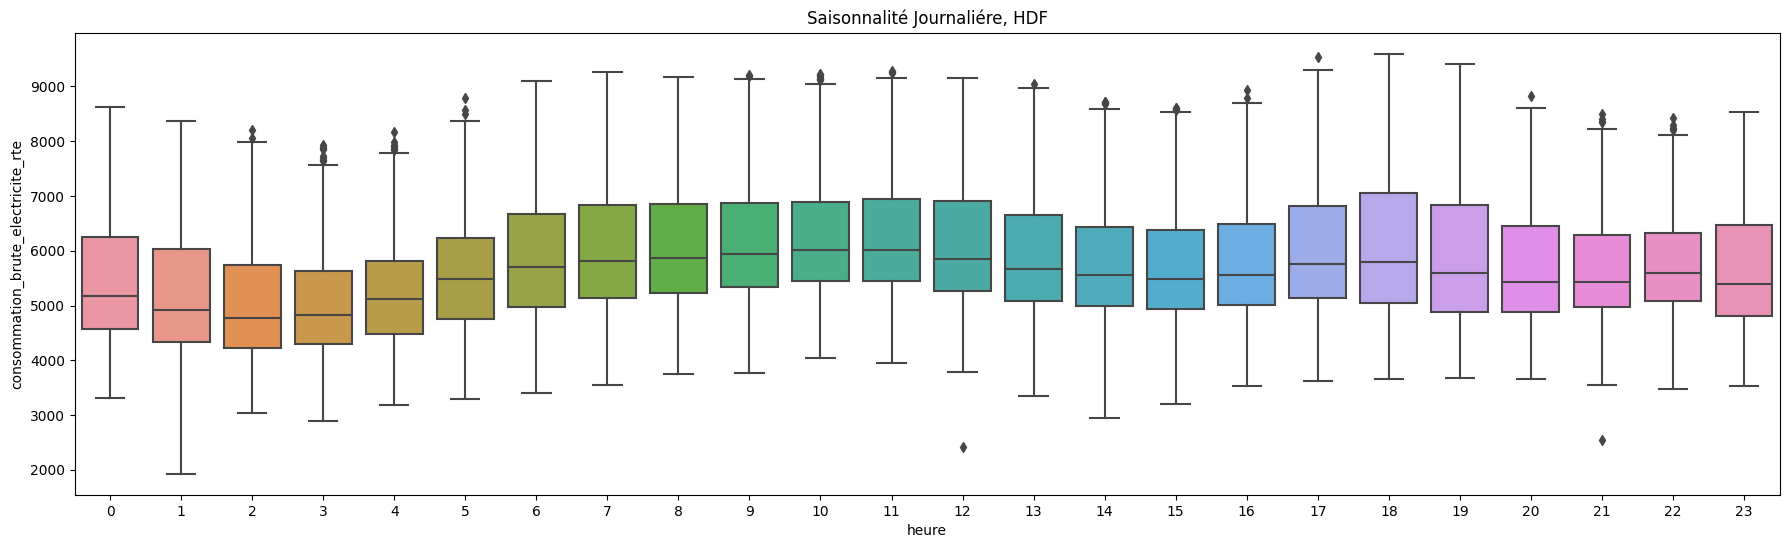

In [68]:
df_hdf["heure"] = df_hdf.index.hour
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='heure', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité Journaliére, HDF')
plt.show()

/tmp/ipykernel_161391/1631102186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf["jour_de_semaine"] = df_hdf.index.weekday


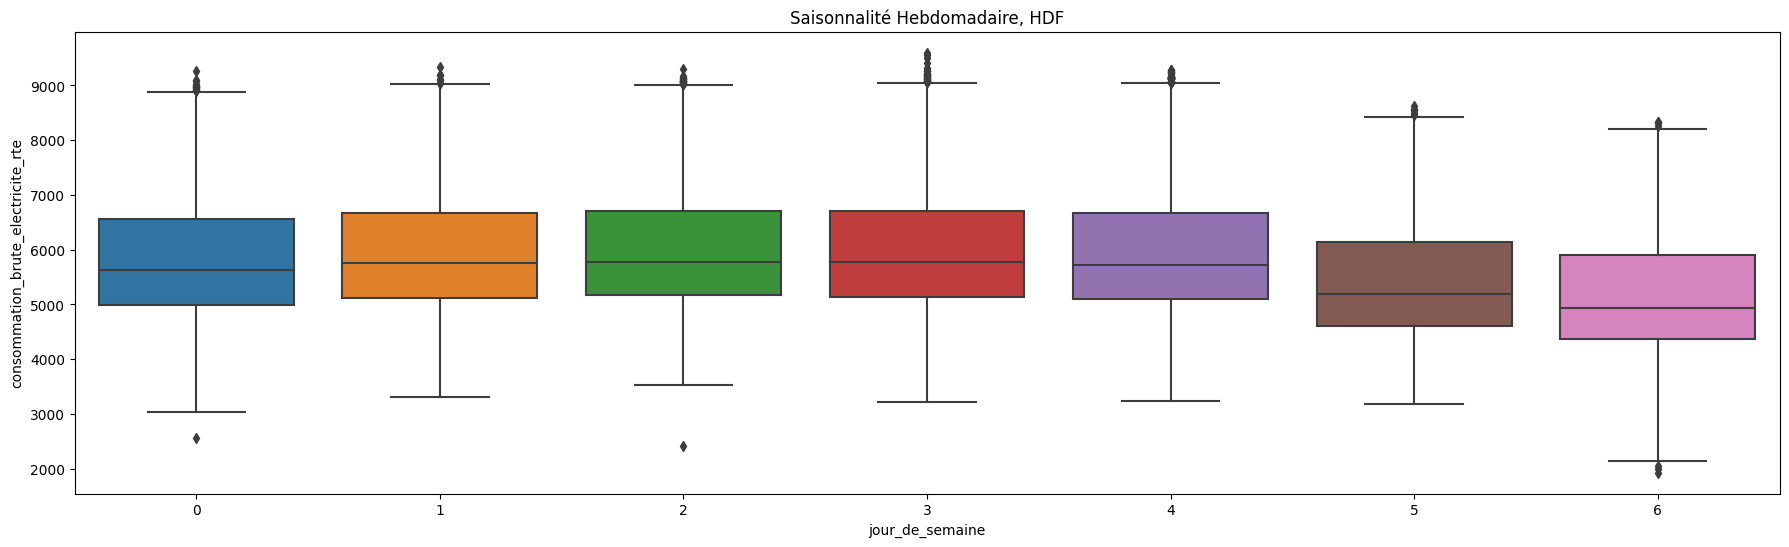

In [69]:
df_hdf["jour_de_semaine"] = df_hdf.index.weekday
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='jour_de_semaine', y='consommation_brute_electricite_rte')
plt.title('Saisonnalité Hebdomadaire, HDF')
plt.show()



    6. Qu’est ce que la stationnarité? 

-  quand un modéle suit un tendance qui se répéte a des moments précis comme chaque année chaque mois jours etc...



    7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 


- visuelement la time-series est stationnaire car elle suit une même tendance les jours de semaine, même si le modéle change légérement entre les jours de semaine et le weekend

     
    8. Réalisez un test de Dickey Fuller, quelle est l’hypothèse nulle et l’hypothèse alternative, quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? 

In [70]:
from statsmodels.tsa.stattools import adfuller

df_jour = df_hdf['consommation_brute_electricite_rte'].resample('D').mean()

result = adfuller(df_jour.dropna())

print('Statistique de test :', result[0])
print('Valeur p :', result[1])
print('Valeurs critiques :', result[4])

Statistique de test : -4.236425652702576
Valeur p : 0.0005713466895179795
Valeurs critiques : {'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499}


- Hypothèse nulle (H0) : La série temporelle n'est pas stationnaire.

- Hypothèse alternative (H1) : La série temporelle est stationnaire.

- La statistique de test calculée est -4.236.

- Valeur p : La valeur p est 0.000571. est extrêmement faible, signifiant qu'il est improbable de voir une statistique de test aussi extrême que -4.101 sous l'hypothèse nulle. donc on rejete l'hypothèse nulle, la série est probablement stationnaire.

     
    9. Pour vous la série temporelle est plutôt additive ou multiplicative? 

- la série temporelle est plutot additive 